In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("Program_4_Dataset.csv")

In [6]:
data.head()

,index,OS_Time_Stamp,Temperature,Pressure,Humidity,TimeStamp
0,0,1456761674,17.7,1015.2,76.4,2016-03-01 00:01:14+08:00
1,1,1456761733,17.7,1015.3,76.4,2016-03-01 00:02:13+08:00
2,2,1456761792,17.7,1015.3,76.5,2016-03-01 00:03:12+08:00
3,3,1456761853,17.7,1015.3,76.7,2016-03-01 00:04:13+08:00
4,4,1456761912,17.6,1015.2,76.8,2016-03-01 00:05:12+08:00


In [7]:
selected_columns = ['Temperature', 'Pressure']
data_subset = data[selected_columns].copy()

In [8]:
# Extracting features and target variable
X = data_subset[['Temperature']]
y = data_subset['Pressure']


Degree: 2
Train-Test Split Ratio: 0.56-0.44
R-squared: 0.6280546123770334
Mean Squared Error: 26.20954136467669
Mean Absolute Error: 3.6895136221702627


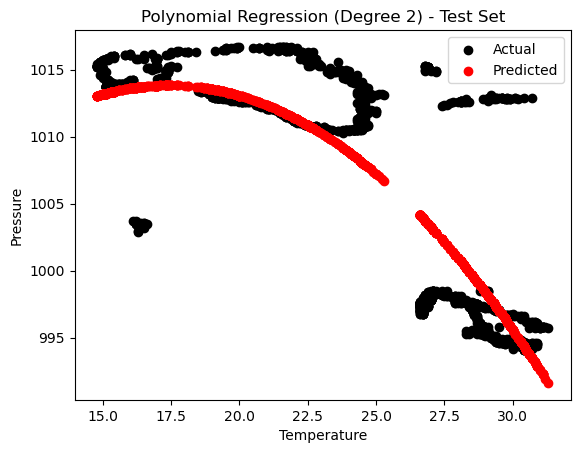

Train-Test Split Ratio: 0.7-0.3
R-squared: 0.6452773599807298
Mean Squared Error: 25.144856469941892
Mean Absolute Error: 3.622318303738578


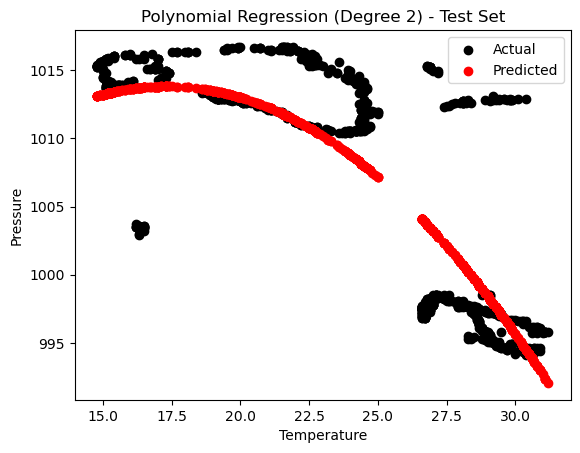

Train-Test Split Ratio: 0.8-0.2
R-squared: 0.6263280190072711
Mean Squared Error: 26.527376101991123
Mean Absolute Error: 3.662882140064598


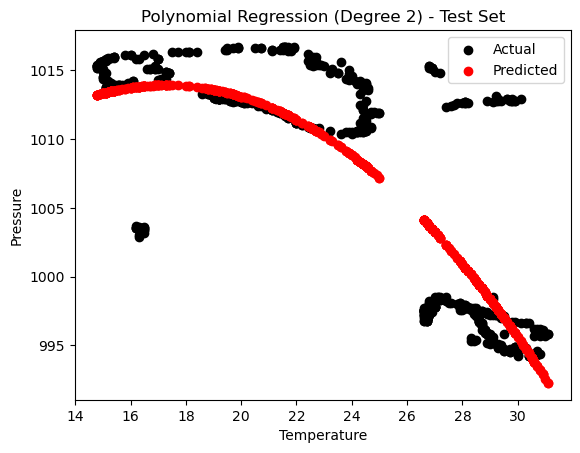

Degree: 3
Train-Test Split Ratio: 0.56-0.44
R-squared: 0.645184617839925
Mean Squared Error: 25.002456664349907
Mean Absolute Error: 3.7451689762643596


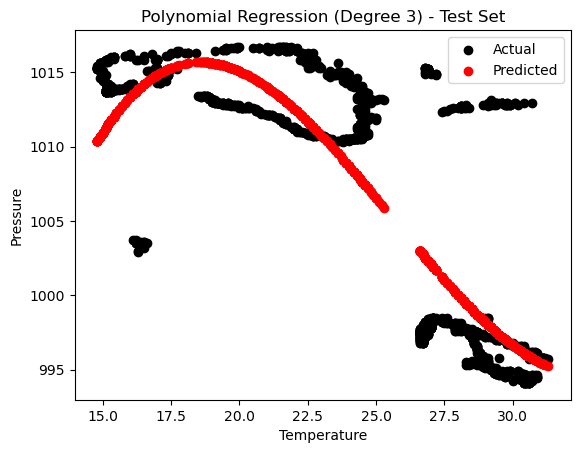

Train-Test Split Ratio: 0.7-0.3
R-squared: 0.6571658253548314
Mean Squared Error: 24.30213113540046
Mean Absolute Error: 3.707064015182593


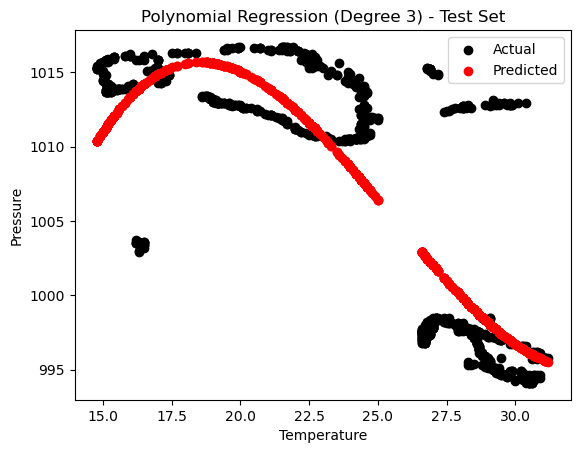

Train-Test Split Ratio: 0.8-0.2
R-squared: 0.6346783881549147
Mean Squared Error: 25.934574408962074
Mean Absolute Error: 3.77799840106459


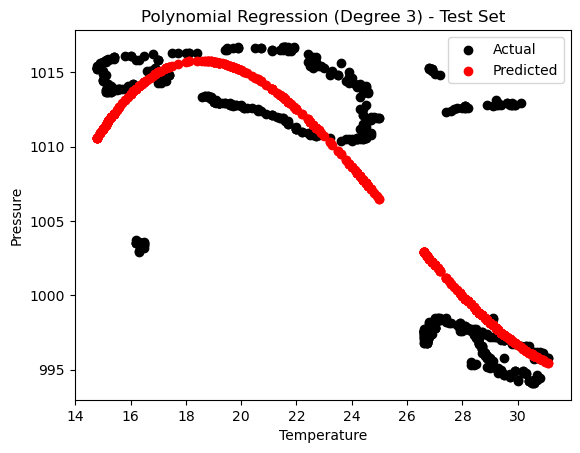

Degree: 4
Train-Test Split Ratio: 0.56-0.44
R-squared: 0.6839005695718974
Mean Squared Error: 22.27429448743225
Mean Absolute Error: 3.2610443801603783


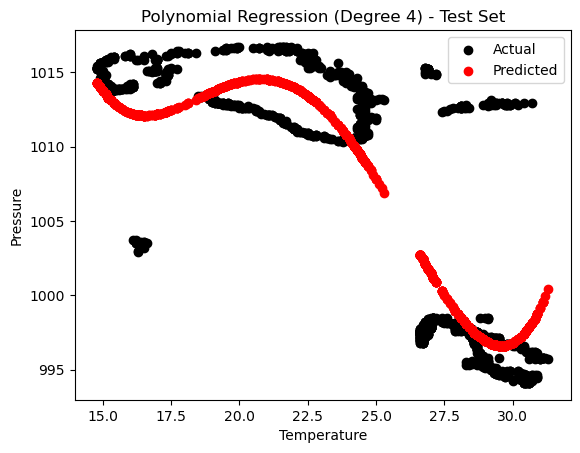

Train-Test Split Ratio: 0.7-0.3
R-squared: 0.6941666047053757
Mean Squared Error: 21.67929520365705
Mean Absolute Error: 3.1852525581232563


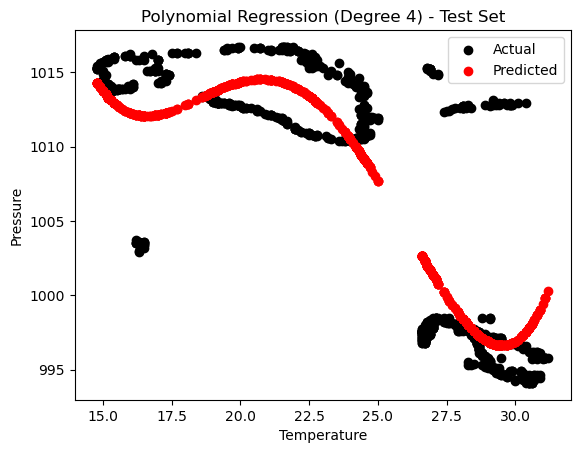

Train-Test Split Ratio: 0.8-0.2
R-squared: 0.6724506321790129
Mean Squared Error: 23.253082152621523
Mean Absolute Error: 3.2670828201083038


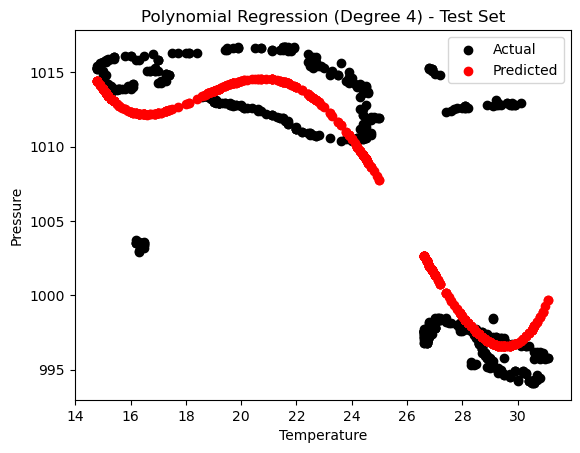

Degree: 5
Train-Test Split Ratio: 0.56-0.44
R-squared: 0.6952494854201965
Mean Squared Error: 21.47458063354855
Mean Absolute Error: 3.3744475529769637


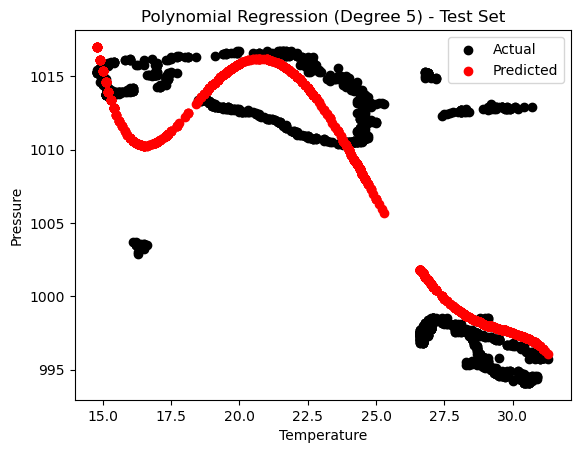

Train-Test Split Ratio: 0.7-0.3
R-squared: 0.7042085670892629
Mean Squared Error: 20.967461014540497
Mean Absolute Error: 3.3119411790815527


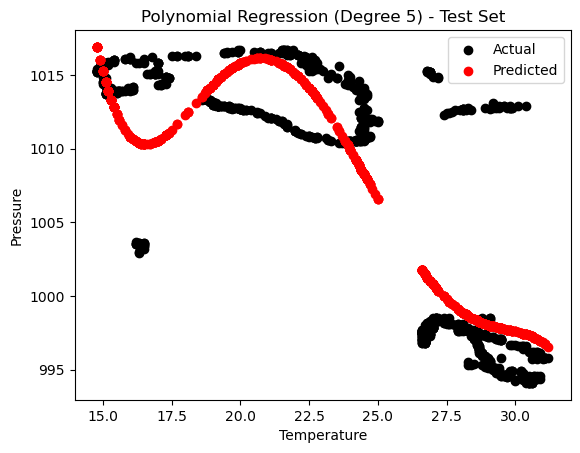

Train-Test Split Ratio: 0.8-0.2
R-squared: 0.6829249353215985
Mean Squared Error: 22.50950009936866
Mean Absolute Error: 3.421093894843016


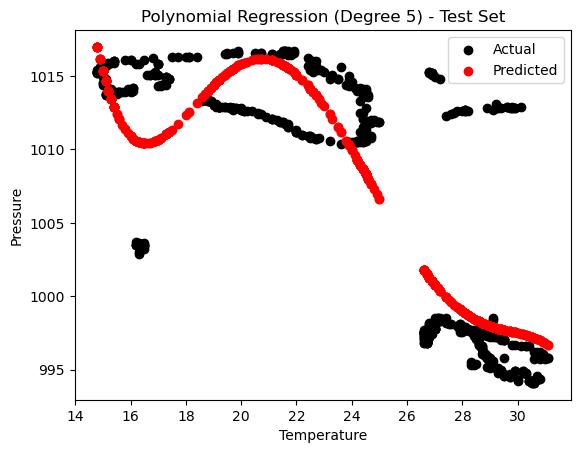

Degree: 6
Train-Test Split Ratio: 0.56-0.44
R-squared: 0.7092794347679384
Mean Squared Error: 20.48594480148734
Mean Absolute Error: 3.1572245056246993


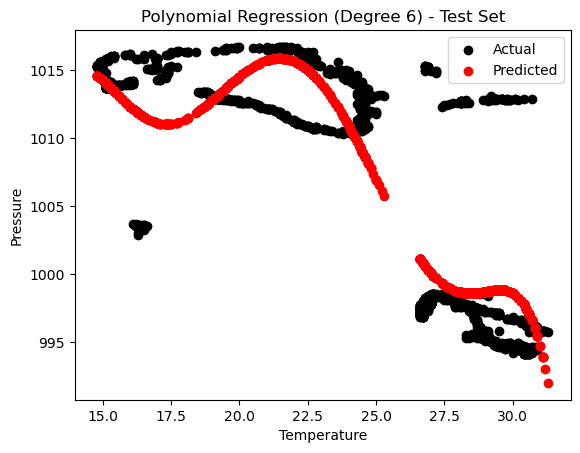

Train-Test Split Ratio: 0.7-0.3
R-squared: 0.7175243508462907
Mean Squared Error: 20.02355883976795
Mean Absolute Error: 3.084939174693079


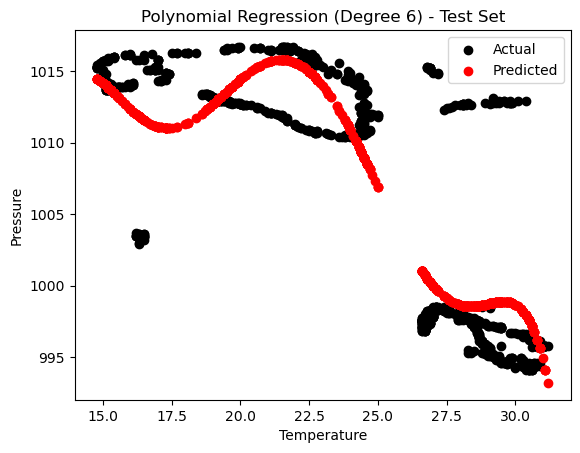

Train-Test Split Ratio: 0.8-0.2
R-squared: 0.6955196859197095
Mean Squared Error: 21.615385199077622
Mean Absolute Error: 3.206753502351993


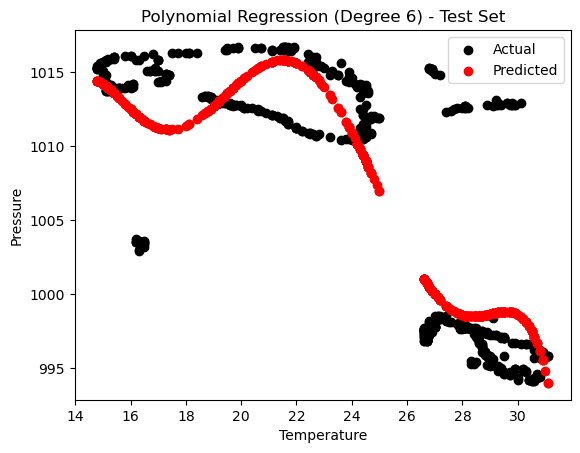

Degree: 7
Train-Test Split Ratio: 0.56-0.44
R-squared: 0.7177533012966062
Mean Squared Error: 19.88882446422158
Mean Absolute Error: 3.126113012161666


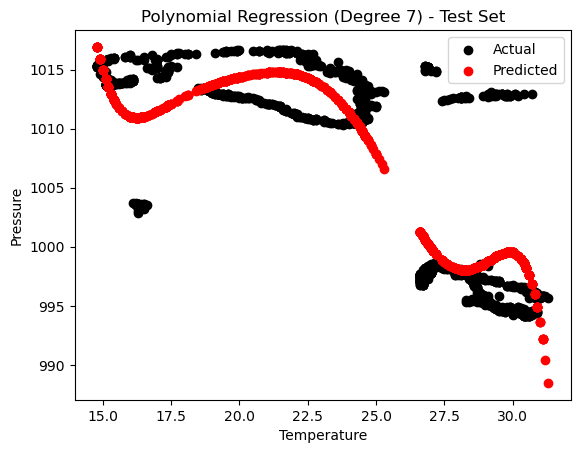

Train-Test Split Ratio: 0.7-0.3
R-squared: 0.7216698265066657
Mean Squared Error: 19.729702799245405
Mean Absolute Error: 3.0601839487276474


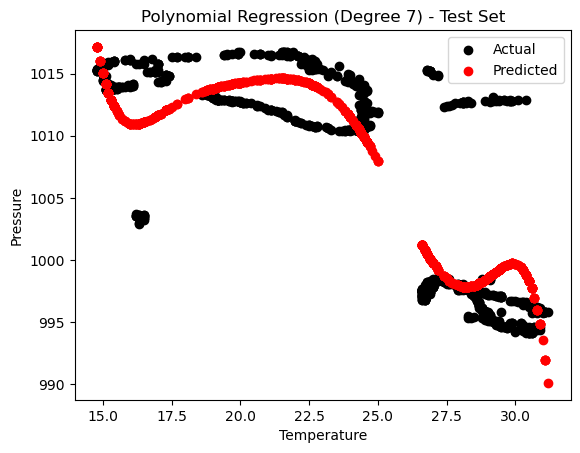

Train-Test Split Ratio: 0.8-0.2
R-squared: 0.704276935436387
Mean Squared Error: 20.993698630738415
Mean Absolute Error: 3.151037251441103


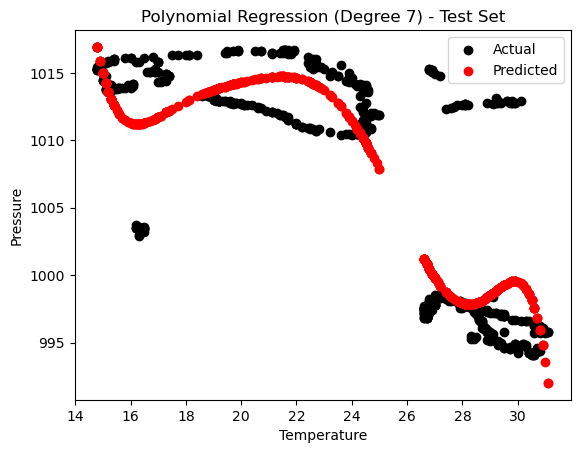

In [9]:
# Specify degrees for polynomial regression
degrees = [2, 3, 4, 5, 6, 7]

# Specify train-test splits
split_ratios = [0.44, 0.30, 0.20]

# Loop over degrees and train-test splits
for degree in degrees:
    print(f"Degree: {degree}")

    for split_ratio in split_ratios:
        print(f"Train-Test Split Ratio: {1 - split_ratio}-{split_ratio}")

        # Split the data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio, random_state=42)

        # Transform features to polynomial features
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # Train a polynomial regression model
        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        # Make predictions on the training set
        y_train_pred = model.predict(X_train_poly)

        # Make predictions on the test set
        y_test_pred = model.predict(X_test_poly)

        # Evaluate the model
        r2 = r2_score(y_test, y_test_pred)
        mse = mean_squared_error(y_test, y_test_pred)
        mae = mean_absolute_error(y_test, y_test_pred)

        print(f"R-squared: {r2}")
        print(f"Mean Squared Error: {mse}")
        print(f"Mean Absolute Error: {mae}")

        # Visualize the results
        plt.scatter(X_test, y_test, color='black', label='Actual')
        plt.scatter(X_test, y_test_pred, color='red', label='Predicted')
        plt.title(f'Polynomial Regression (Degree {degree}) - Test Set')
        plt.xlabel('Temperature')
        plt.ylabel('Pressure')
        plt.legend()
        plt.show()
